# Proyecto Final UD2
#### UD2. Aprendizaxe Supervisada
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Cristina Gómez Alonso

En este proyecto, los alumnos del módulo de Machine Learning deberán demostrar los conocimientos adquiridos durante la UD2 y aplicar al menos dos algoritmos diferentes de aprendizaje supervisado vistos en clase (KNN, Regresión Lineal, Regresión Logística, Árboles de Decisión, SVM).

Para ello, tomaremos como referencia el dataset credit_train.csv y credit_test.csv que contienen la información sobre una campaña de márketing llevada a cabo mediante llamadas teléfonicas para captar clientes que quieran acceder a un crédito.

**Features o Input variables:**

1 - age: edad numérica
2 - job : tipo de trabajo (puede tomar los valores: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : estado civil (puede tomar los valores: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education : nivel de estudios (puede tomar los valores: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: ya tiene un crédito solicitado por defecto? (puede tomar los valores: 'no','yes','unknown')
6 - housing: tiene hipoteca? (puede tomar los valores: 'no','yes','unknown')
7 - loan: tiene una cuenta personal? (puede tomar los valores: 'no','yes','unknown')
8 - contact: tipo de comunicación de contacto (puede tomar los valores: 'cellular','telephone')
9 - month: último mes de contacto (puede tomar los valores: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: último día de la semana en el que se le ha contactado (puede tomar los valores: 'mon','tue','wed','thu','fri')
11 - duration: duración del último contacto en segundos (numérico). Importante: este atributo afecta en gran medida a la salida ya que si duration es 0, entonces  la salida es 'no')
12 - campaign: número de veces que se le ha contactado durante la campaña a este cliente (numérico, incluye el último contacto)
13 - pdays: número de días que han pasado desde que el cliente fue contactado por última vez(numérico; 999 significa que no ha sido contactado anteriormente)
14 - previous: número de contactos anteriores a esta campaña a este cliente(numérico)
15 - poutcome: resultado de la última campaña de marketing (categorical: 'failure','nonexistent','success')
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: IPC - indicador mensual (numérico)
18 - cons.conf.idx: índice de confianza de los consumidores - indicador mensual (numérico)
19 - euribor3m: euribor tasa 3 meses - indicador diario (numérico)
20 - nr.employed: número de trabajadores - indicador en porciones  (numérico)

**Output variable (desired target):**
21 - y - Suscripción al crédito por parte del cliente? (binary: 'yes','no')

Los requisitos mínimos de este proyecto consisten en:

* Etapas comunes 1, 2 y 3 de importación, análisis numérico y visual, así como preprocesado.
* Para cada algoritmo que apliques deberás de mantener la siguiente estructura de 5 etapas (del 4-8), pero puedes añadir subapartados o etapas adicionales.
* En cada etapa se deben añadir explicaciones justificativas de lo que se quiere hacer, así como de los resultados obtenidos.
* Como resultado final, se deben contrastar los resultados obtenidos y comparar los algoritmos utilizados indicando claramente cual y porqué obtiene mejor resultados.

* Cualificaciones:
- Uso de 2 algoritmos: cualificación máxima de 7 puntos
- Uso de 3 algoritmos: cualificación máxima de 9 puntos.
- Almacenaje de los datasets en AWS S3 y uso de 3 algoritmos: cualificación máxima de 10 puntos.

Uso de GIT para 



## 1. Importación de paquetes y dataset

In [124]:
import pandas as pd
import numpy as np

#df_campaign_train = pd.read_csv('https://credit-campaign-dataset.s3.amazonaws.com/credit-train.csv') # URL pública de mi bucket S3. Por si el lab estuviera parado, se carga en local más adelante, sobreescribiendo el Dataframe.
#df_campaign_test = pd.read_csv('https://credit-campaign-dataset.s3.amazonaws.com/credit-test.csv') # Ídem

df_campaign_train = pd.read_csv('data/credit-train.csv')
df_campaign_test = pd.read_csv('data/credit-test.csv')

## 2.EDA y Visual EDA

In [125]:
print(df_campaign_train.shape)
df_campaign_train.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [126]:
print(df_campaign_test.shape)
df_campaign_test.head()

(4119, 20)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


## 3. Preprocessing data

Lleva a cabo al menos 2 técnicas de preprocesado de datos. ¿Por qué las aplicas?

La regresión logística y el árbol de decisiones se adaptan a las características de clasificación binaria del ejercicio, así como al tamaño del conjunto de datos y el número de características. Eso excluiría las regresión lineal y las SVM, por ejemplo.


In [127]:
#df_campaign_train.isnull(999).sum()

Como no hay nulos en ningún campo, no limpiamos ni rellenamos.

In [128]:
df_campaign_test.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
dtype: int64

In [129]:
df_campaign_test.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
dtype: object

Elimino columnas poco relacionadas con la variable dependiente, después de comprobar que muchas de ellas tienen prácticamente un solo valor, siendo el alternativo muy márginal.

In [130]:
df_campaign_train.drop(columns=['contact','month','day_of_week','default','previous','pdays','nr_employed','poutcome'],inplace=True)
#df_campaign_train['duration'].replace(to_replace=0, value=1, inplace=True)
df_campaign_train.head(5)

,age,job,marital,education,housing,loan,duration,campaign,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,y
0,44,blue-collar,married,basic.4y,yes,no,210,1,1.4,93.444,-36.1,4.963,0
1,53,technician,married,unknown,no,no,138,1,-0.1,93.200,-42.0,4.021,0
2,28,management,single,university.degree,yes,no,339,3,-1.7,94.055,-39.8,0.729,1
3,39,services,married,high.school,no,no,185,2,-1.8,93.075,-47.1,1.405,0
4,55,retired,married,basic.4y,yes,no,137,1,-2.9,92.201,-31.4,0.869,1


Distribución visual de las características no categóricas de la muestra de datos en relación al target.

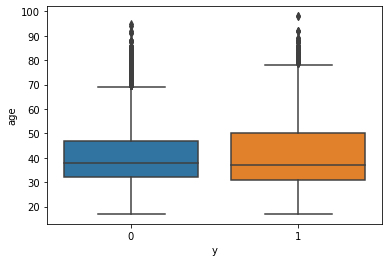

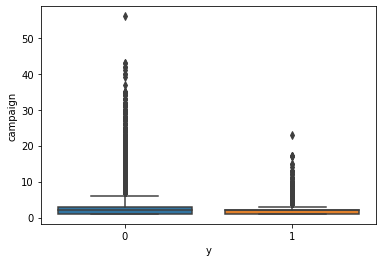

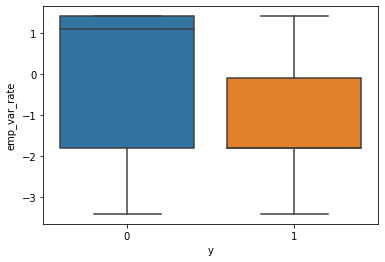

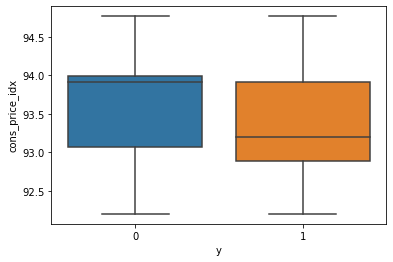

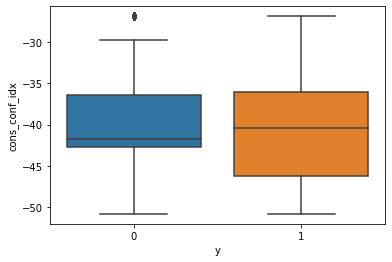

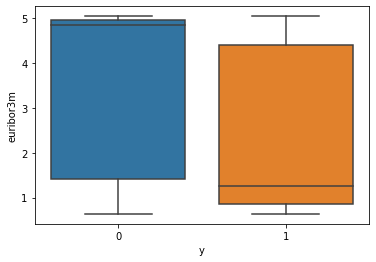

In [131]:
import seaborn as sns
from matplotlib import pyplot as plt

for variable in ['age','campaign','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m']:
    sns.boxplot(x='y',y=variable,data=df_campaign_train)
    plt.show()

Intercorrelación de variables no categóricas.

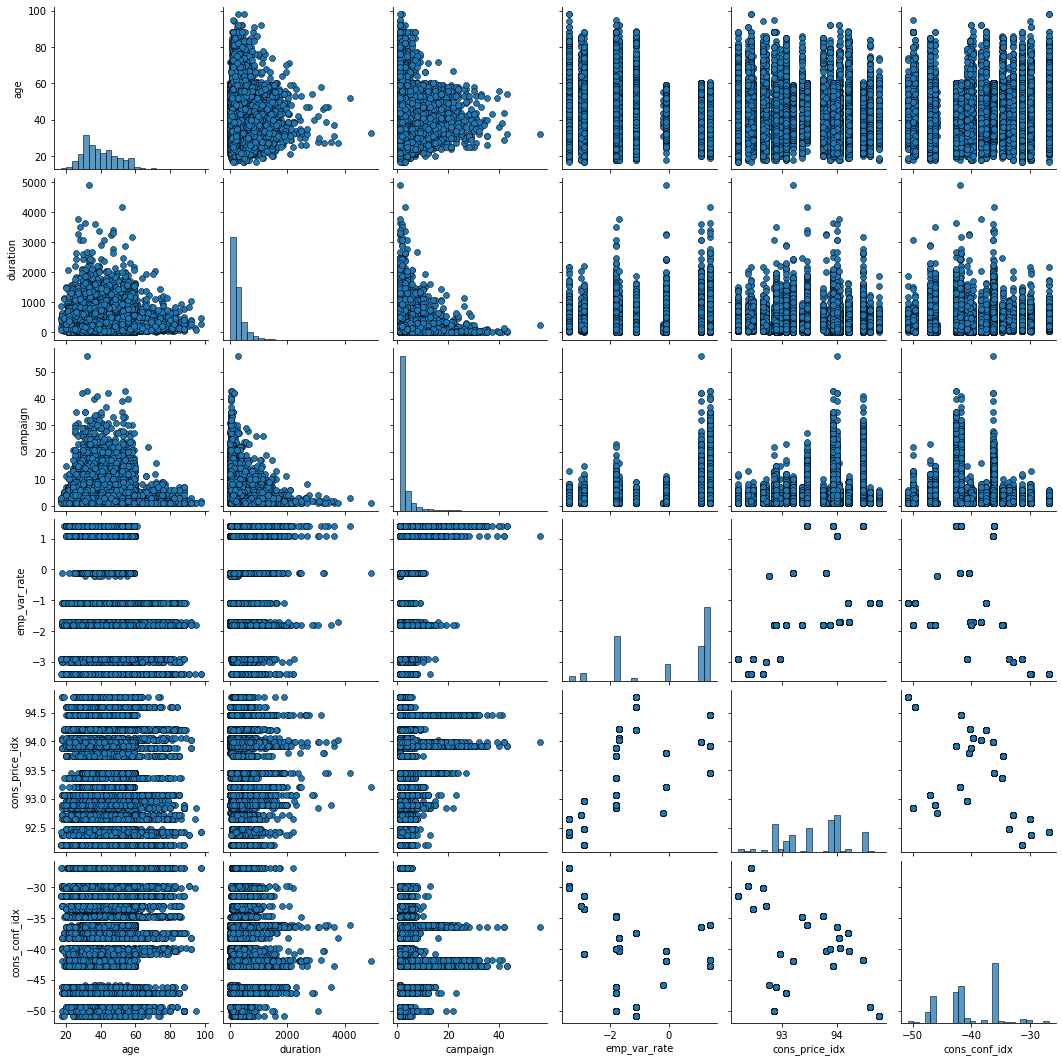

In [132]:
sns.pairplot(data=df_campaign_train.iloc[:,[0,6,7,8,9,10]],diag_kws={'edgecolor':'k','bins':25},plot_kws={'edgecolor':'k'})
plt.show()

In [133]:
# Para regresión logística
df_campaign_train_numerico = pd.get_dummies(data=df_campaign_train) # Obtenemos dummies
df_campaign_train_numerico.head()

,age,duration,campaign,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,y,job_admin.,job_blue-collar,...,education_illiterate,education_professional.course,education_university.degree,education_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,44,210,1,1.4,93.444,-36.1,4.963,0,0,1,...,0,0,0,0,0,0,1,1,0,0
1,53,138,1,-0.1,93.200,-42.0,4.021,0,0,0,...,0,0,0,1,1,0,0,1,0,0
2,28,339,3,-1.7,94.055,-39.8,0.729,1,0,0,...,0,0,1,0,0,0,1,1,0,0
3,39,185,2,-1.8,93.075,-47.1,1.405,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,55,137,1,-2.9,92.201,-31.4,0.869,1,0,0,...,0,0,0,0,0,0,1,1,0,0


In [134]:
# Para árbol de decisiones
from sklearn.preprocessing import LabelEncoder
ad_labelencoder = LabelEncoder()
df_campaign_train['job'] = ad_labelencoder.fit_transform(df_campaign_train['job']) # Obtenemos valores numéricos para las categorías.
df_campaign_train['marital'] = ad_labelencoder.fit_transform(df_campaign_train['marital'])
df_campaign_train['education'] = ad_labelencoder.fit_transform(df_campaign_train['education'])
df_campaign_train['housing'] = ad_labelencoder.fit_transform(df_campaign_train['housing'])
df_campaign_train['loan'] = ad_labelencoder.fit_transform(df_campaign_train['loan'])
df_campaign_train.head()


,age,job,marital,education,housing,loan,duration,campaign,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,y
0,44,1,1,0,2,0,210,1,1.4,93.444,-36.1,4.963,0
1,53,9,1,7,0,0,138,1,-0.1,93.200,-42.0,4.021,0
2,28,4,2,6,2,0,339,3,-1.7,94.055,-39.8,0.729,1
3,39,7,1,3,0,0,185,2,-1.8,93.075,-47.1,1.405,0
4,55,5,1,0,2,0,137,1,-2.9,92.201,-31.4,0.869,1


## 4. Creación del modelo y división del dataset

Preparación del conjunto de entrenamiento y del objetivo.

In [135]:
# Para regresión logística
columnas_rlX = df_campaign_train_numerico.columns.drop('y') # El dataset "numérico" es el que tiene "dummies" para este modelo. Tiene bastantes más columnas.
rlX = df_campaign_train_numerico[columnas_rlX]
y = df_campaign_train['y']
print(rlX.shape)

# Para árbol de decisiones
columnas_adX = df_campaign_train.columns.drop('y') # El dataset original tras el LabelEncoder.
adX = df_campaign_train[columnas_adX]
print(adX.shape)
print(y.shape)

(41188, 37)
(41188, 12)
(41188,)


División del dataset.

In [136]:
# Para regresión logística
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(rlX, y, test_size=0.30, random_state=42)

# Para árbol de decisiones, no requerido.


Creación del modelo.

In [137]:
# Para regresión logística
from sklearn.linear_model import LogisticRegression
rl = LogisticRegression(penalty='l2',solver='newton-cg')

# Para árbol de decisiones
from sklearn.tree import DecisionTreeClassifier
ad = DecisionTreeClassifier(max_depth=4) # Hiperparámetro. Profundidad máxima, 4 ramas.

## 5. Entrenamiento

In [138]:
# Para regresión logística
rl.fit(X_train,y_train)

# Para árbol de decisiones
ad.fit(adX, y)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


DecisionTreeClassifier(max_depth=4)

## 6. Análisis de resultados

In [139]:
# Para regresión logística
print('Intercepción: {}'.format(rl.intercept_)) #
print('Coeficientes: {}'.format(rl.coef_))  # Pesos en la función de decisión.
print('Score: {}'.format(rl.score(X_test, y_test))) # La precisión media de predicción de etiqueta para esta muestra.

# Para árbol de decisiones
from sklearn.tree import export_graphviz
export_graphviz(ad,
                out_file='./img/ad.dot',
                feature_names=adX.columns,
                class_names=[str(i) for i in y.unique()],
                rounded=True,
                filled=True)
! dot -Tpng ./img/ad.dot -o ./img/ad.png

Intercepción: [-113.34396229]
Coeficientes: [[ 1.25834800e-03  4.81560329e-03 -5.67458515e-02 -7.94465080e-01
   1.19945631e+00  5.32691053e-02 -2.33250097e-01  7.33173245e-02
  -3.43539303e-01 -1.43610971e-01  5.86989595e-02  3.85118108e-02
   2.85849012e-01 -2.30813643e-01 -1.94499573e-01  3.15577287e-01
   7.48582387e-02 -1.82783129e-02  8.38083196e-02 -8.00501451e-03
  -1.13641106e-03  1.20115911e-01 -1.11095336e-01 -1.92319239e-01
  -1.12621499e-01 -2.70890951e-01 -1.73755686e-01  8.48697000e-01
  -5.83408087e-02  5.54099255e-02 -9.62995912e-02  5.94028058e-04
  -3.02487471e-02  2.95338688e-02  6.46580302e-02 -3.02487471e-02
  -3.45301333e-02]]
Score: 0.899166464352189
/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)


## 7. Realización de predicciones

In [140]:
# Para regresión logística
umbral_probabilidad = 0.5
datos_probabilidad = pd.DataFrame(rl.predict_proba(X_test), columns=['Probabilidad de NO', 'Probabilidad de SI'])
datos_probabilidad['Decision'] = (datos_probabilidad['Probabilidad de SI'] > umbral_probabilidad).apply(int)
datos_probabilidad.head(50)

,Probabilidad de NO,Probabilidad de SI,Decision
0,0.968034,0.031966,0
1,0.936171,0.063829,0
2,0.401706,0.598294,1
3,0.991055,0.008945,0
4,0.988204,0.011796,0
5,0.947235,0.052765,0
6,0.973124,0.026876,0
7,0.945370,0.054630,0
8,0.984593,0.015407,0
9,0.848634,0.151366,0


In [141]:
# Para árbol de decisiones
ad.predict_proba([[44,1,1,0,2,0,210,1,1.4,93.444,-36.1,4.963]]) # Dato real de ejemplo.

array([[0.98631741, 0.01368259]])

In [142]:
ad.predict_proba([[44,1,1,0,2,0,210,1,1.4,93.444,-36.1,4.963]]) # Decisión sobre ese ejemplo.

array([[0.98631741, 0.01368259]])

## 8. Visualización

In [143]:
# Para regresión logística
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, rl.predict(X_test)))
print(confusion_matrix(y_test, rl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     10931
           1       0.62      0.33      0.43      1426

    accuracy                           0.90     12357
   macro avg       0.77      0.65      0.69     12357
weighted avg       0.88      0.90      0.89     12357

[[10638   293]
 [  953   473]]


In [144]:
# Para árbol de decisiones

![Resultado](img/ad.png)

## 9. Comparación de los modelos

Con la selección de características decidida por mí y su traslación a un modelo puramente numérico mediante el "dummies" o bien el LabelEncoder, creo que ambos modelos adolecen de la misma falta de precisión cuando el target es 0 (no contrata). Al ser el valor abrumadoramente mayoritario en el conjunto de datos, su predictibilidad combinando características es bastante baja.

Prueba de ello es el valor combinado en F1 del modelo de regresión logística, que apenas alcanza el 0.43 para dicha etiqueta, similar al valor de Gini en muchas de las ramas en el árbol de decisiones. Aunque son 2 valores matemáticos diferentes, y en un caso queremos que llegue a 1 y en el otro a 0, su valor intermedio muestra la aleatoridad de la predicción en ambos modelos. de manera especial para esa etiqueta.